## Python'da Türkiye Haritası Çizmek



Haritamızı çizdirmek için **geojson** formatında coğrafi ve mekansal bilgilerin kayıtlı olduğu bir dosya türü kullanacağız. 

**GeoJSON nedir?**

GeoJSON, JavaScript Object Notation (JSON) tabanlı bir jeo-uzamsal veri değişim formatıdır. Çeşitli JSON nesnesi türlerini ve coğrafi özellikler, özellikleri ve uzamsal kapsamları hakkındaki verileri temsil etmek için bir araya getirilme biçimini tanımlar. GeoJSON bir coğrafi koordinat referans sistemi olan World Geodetic System 1984 ve ondalık derece birimleri kullanır.

[RFC 7946 – The GeoJSON Format (ietf.org)](https://tools.ietf.org/pdf/rfc7946.pdf)
[GeoJSON Dosyası Nedir? Nasıl Kullanılır?](https://www.cakirefekan.com/2021/01/geojson-dosyasi-nedir-nasil-kullanilir/)


In [1]:
import geopandas as gp
import pandas as pd

In [2]:
ulke = gp.read_file("./Konum_Verileri/countries.geojson")

In [3]:
ulke.head(10) 

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
5,Aland,ALA,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59..."
6,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ..."
7,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24..."
8,Argentina,ARG,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65414..."
9,Armenia,ARM,"MULTIPOLYGON (((45.54717 40.62155, 45.51369 40..."


In [4]:
ulke.shape

(255, 3)

Görüldüğü gibi okuttuğumuz verimiz 255 satır ve 3 sütundan oluşuyor. Bu sütunlar ülke adı, ülke kodu ve enlem&boylam değerlerinden oluşurken her bir satır farklı bir ülkeyi temsil ediyor. Şimdi gelin, burada Türkiye'nin bilgilerini data frame objesine uygulanan basit bir veri kümeleme işlemi uygulayarak elde edelim.

In [5]:
turkiye = ulke[ulke['ADMIN'] == 'Turkey']
turkiye

,ADMIN,ISO_A3,geometry
230,Turkey,TUR,"MULTIPOLYGON (((26.04005 39.84504, 26.04623 39..."


```.plot()``` komutu kullanarak elde ettiğimiz bu satırı görselleştirebilir ve illere bölünmemiş bir Türkiye haritası elde edebiliriz. 

<Axes: >

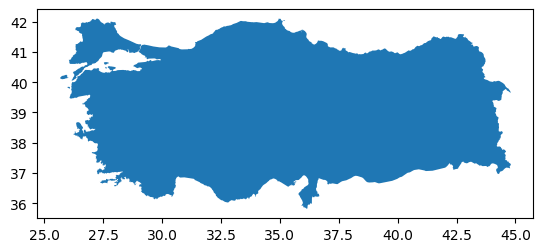

In [6]:
turkiye.plot() 

**Peki İller?**
İlleri çizdirmek istediğim için adm1 uzantılı dosyayı okuttum. İlçeleri çizdirmek isterseniz eğer ```TUR_adm2``` isimli dosyayı okutabilirsiniz. 

In [7]:
turkiye_iller = gp.read_file('./Konum_Verileri/TUR_adm1.shp')
turkiye_iller

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...,...,...,...,...,...,...,...,...
76,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051..."
77,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728..."
78,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181..."
79,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


Yine ```.plot()``` fonksiyonu kullanarak il grafiğimizi çizdirelim.

<Axes: >

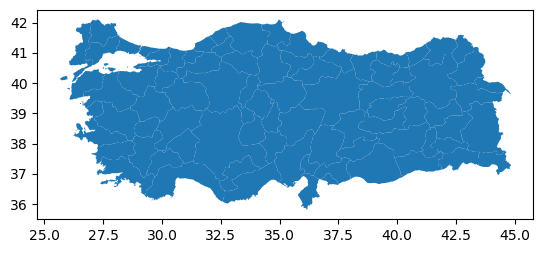

In [8]:
turkiye_iller.plot()

Şimdi isterseniz görseli daha da büyütüp, siyah beyaz bir hale getirelim.

<Axes: >

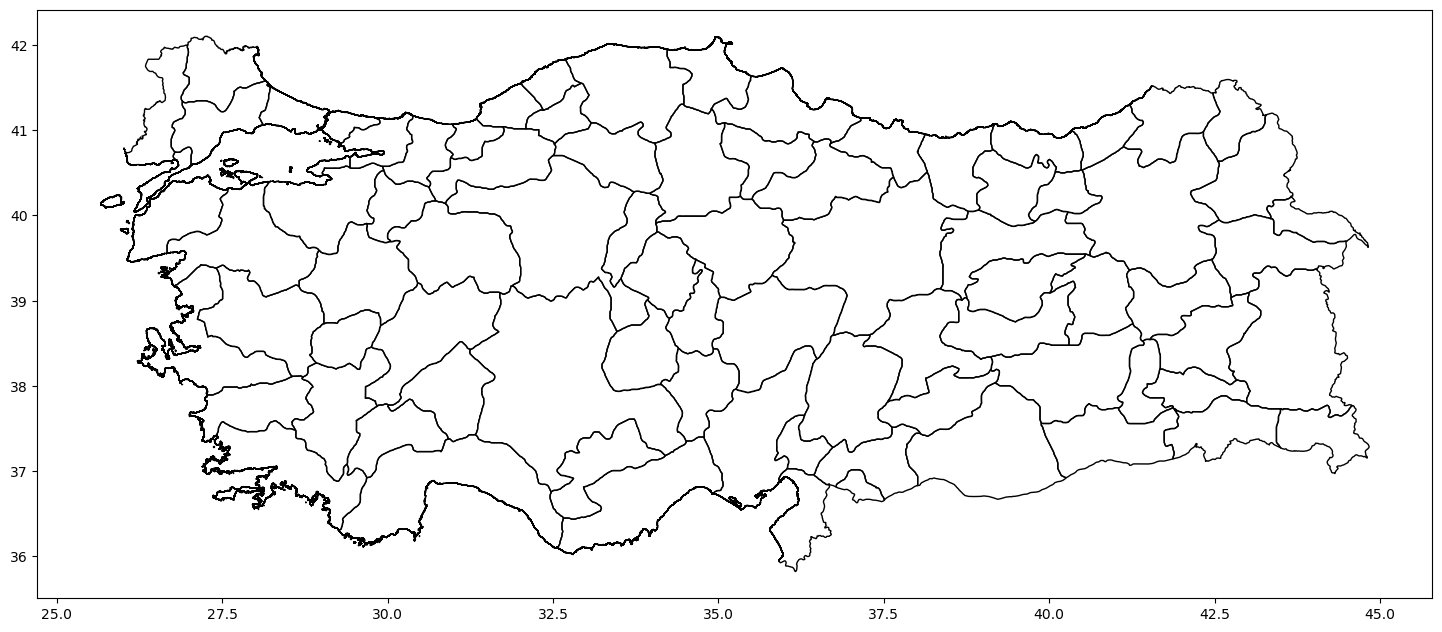

In [9]:
turkiye_iller.plot(figsize=(18,18),edgecolor ="k",facecolor="none")
#figsize görselin büyüklüğünü ayarlıyor 
#edgecolor ise il ve ülke sınırlarının çizgi rengini ayarlıyor (b=mavi, r=kırmızı)
#facecolor ise illerin içlerinin renklerini ayarlıyor 

Yukarıda açıkladığım argümanları değiştirirsek eğer örneğin;

<Axes: >

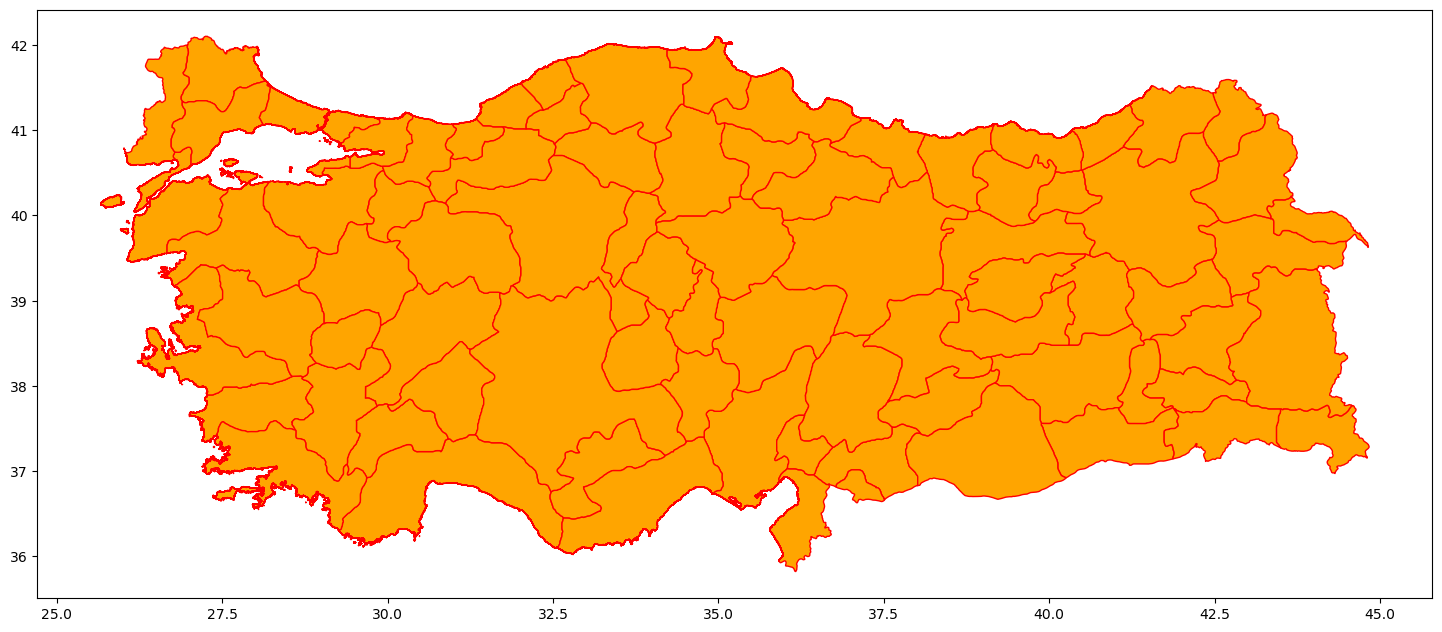

In [10]:
turkiye_iller.plot(figsize=(18,18),edgecolor ="red",facecolor="orange")

Haritamız hazır! 

Ancak işimiz elbette bununla sınırlı değil. Haritayı kullanmamızın arkasında bir hikaye var ve bu hikayeyi içeren bir de veri setimiz var. 

In [11]:
iller = pd.read_excel('iller_veri.xlsx')


In [12]:
iller

,ğ,il,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%)
0,1,Adana,26,19.3,668.2,72
1,2,Adiyaman,679,17.4,715.1,68
2,3,Afyon,1025,11.7,451.4,64
3,4,Agri,1630,6.3,523.9,67
4,68,Aksaray,979,12.1,359.7,63
...,...,...,...,...,...,...
76,67,Usak,911,12.6,557.6,66
77,5,Van,1727,9.5,393.2,70
78,76,Yalova,7,14.7,755.9,76
79,11,Yozgat,1313,9.2,571.4,65


Şimdi bu iki veri setini tek bir veri seti altında birleştireceğiz. Bunu da il değişkeni üzerinden yapacağız. O yüzden her iki veri setinde de il değişkenlerinin aynı olması lazım. Önce harita için kullandığımız veride yer alan il isimlerini gösterelim.

In [13]:
for i in turkiye_iller["NAME_1"].items():
    print(i)

(0, 'Çanakkale')
(1, 'Çankiri')
(2, 'Çorum')
(3, 'Adana')
(4, 'Adiyaman')
(5, 'Afyon')
(6, 'Agri')
(7, 'Aksaray')
(8, 'Amasya')
(9, 'Ankara')
(10, 'Antalya')
(11, 'Ardahan')
(12, 'Artvin')
(13, 'Aydin')
(14, 'Balikesir')
(15, 'Bartın')
(16, 'Batman')
(17, 'Bayburt')
(18, 'Bilecik')
(19, 'Bingöl')
(20, 'Bitlis')
(21, 'Bolu')
(22, 'Burdur')
(23, 'Bursa')
(24, 'Düzce')
(25, 'Denizli')
(26, 'Diyarbakir')
(27, 'Edirne')
(28, 'Elazığ')
(29, 'Erzincan')
(30, 'Erzurum')
(31, 'Eskisehir')
(32, 'Gümüshane')
(33, 'Gaziantep')
(34, 'Giresun')
(35, 'Hakkari')
(36, 'Hatay')
(37, 'Iğdır')
(38, 'Isparta')
(39, 'Istanbul')
(40, 'Izmir')
(41, 'K. Maras')
(42, 'Kütahya')
(43, 'Karabük')
(44, 'Karaman')
(45, 'Kars')
(46, 'Kastamonu')
(47, 'Kayseri')
(48, 'Kilis')
(49, 'Kinkkale')
(50, 'Kirklareli')
(51, 'Kirsehir')
(52, 'Kocaeli')
(53, 'Konya')
(54, 'Malatya')
(55, 'Manisa')
(56, 'Mardin')
(57, 'Mersin')
(58, 'Mugla')
(59, 'Mus')
(60, 'Nevsehir')
(61, 'Nigde')
(62, 'Ordu')
(63, 'Osmaniye')
(64, 'Rize')
(6

In [14]:
for j in iller["il"].items():
    print(j)

(0, 'Adana')
(1, 'Adiyaman')
(2, 'Afyon')
(3, 'Agri')
(4, 'Aksaray')
(5, 'Amasya')
(6, 'Ankara')
(7, 'Antalya')
(8, 'Ardahan')
(9, 'Artvin')
(10, 'Aydin')
(11, 'Balikesir')
(12, 'Bartin')
(13, 'Batman')
(14, 'Bayburt')
(15, 'Bilecik')
(16, 'Bingöl')
(17, 'Bitlis')
(18, 'Bolu')
(19, 'Burdur')
(20, 'Bursa')
(21, 'Çanakkale')
(22, 'Çankiri')
(23, 'Çorum')
(24, 'Denizli')
(25, 'Diyarbakir')
(26, 'Düzce')
(27, 'Edirne')
(28, 'Elazig')
(29, 'Erzincan')
(30, 'Erzurum')
(31, 'Eskisehir')
(32, 'Gaziantep')
(33, 'Giresun')
(34, 'Gümüshane')
(35, 'Hakkari')
(36, 'Hatay')
(37, 'Igdir')
(38, 'Isparta')
(39, 'Istanbul')
(40, 'Izmir')
(41, 'K. Maras')
(42, 'Karabük')
(43, 'Karaman')
(44, 'Kars')
(45, 'Kastamonu')
(46, 'Kayseri')
(47, 'Kilis')
(48, 'Kinkkale')
(49, 'Kirklareli')
(50, 'Kirsehir')
(51, 'Kocaeli')
(52, 'Konya')
(53, 'Kütahya')
(54, 'Malatya')
(55, 'Manisa')
(56, 'Mardin')
(57, 'Mersin')
(58, 'Mugla')
(59, 'Mus')
(60, 'Nevsehir')
(61, 'Nigde')
(62, 'Ordu')
(63, 'Osmaniye')
(64, 'Rize')
(6

Görüldüğü gibi bazı il isimlerinde harf bazılarında da yazım açısından uyuşmazlık var. Harita verimizde ```replace()``` komutu yardımıyla uyuşmazlık olan illeri değiştirelim. 

In [15]:
turkiye_iller.replace("K. Maras","Kahramanmaras",inplace=True)
turkiye_iller.replace('Gümüshane', 'Gumushane',inplace=True)
turkiye_iller.replace('Kinkkale', 'Kirikkale',inplace=True)
turkiye_iller.replace('Zinguldak', 'Zonguldak',inplace=True)
turkiye_iller.replace('Afyon', 'Afyonkarahisar',inplace=True)
turkiye_iller.replace('Kütahya', 'Kutahya',inplace=True)
turkiye_iller.replace('Elazığ','Elazig',inplace = True)
turkiye_iller.replace('Bingöl','Bingol',inplace = True)
turkiye_iller.replace('Bartın','Bartin',inplace = True)
turkiye_iller.replace('Karabük','Karabuk',inplace=True)
turkiye_iller.replace('Düzce','Duzce',inplace = True)

In [16]:
iller.replace("K. Maras","Kahramanmaras",inplace=True)
iller.replace('Gümüshane', 'Gumushane',inplace=True)
iller.replace('Kinkkale', 'Kirikkale',inplace=True)
iller.replace('Zinguldak', 'Zonguldak',inplace=True)
iller.replace('Afyon', 'Afyonkarahisar',inplace=True)
iller.replace('Kütahya', 'Kutahya',inplace=True)
iller.replace('Elazığ','Elazig',inplace = True)
iller.replace('Bingöl','Bingol',inplace = True)
iller.replace('Bartın','Bartin',inplace = True)
iller.replace('Karabük','Karabuk',inplace=True)
iller.replace('Düzce','Duzce',inplace = True)

In [17]:
for i in turkiye_iller["NAME_1"].items():
    print(i)

(0, 'Çanakkale')
(1, 'Çankiri')
(2, 'Çorum')
(3, 'Adana')
(4, 'Adiyaman')
(5, 'Afyonkarahisar')
(6, 'Agri')
(7, 'Aksaray')
(8, 'Amasya')
(9, 'Ankara')
(10, 'Antalya')
(11, 'Ardahan')
(12, 'Artvin')
(13, 'Aydin')
(14, 'Balikesir')
(15, 'Bartin')
(16, 'Batman')
(17, 'Bayburt')
(18, 'Bilecik')
(19, 'Bingol')
(20, 'Bitlis')
(21, 'Bolu')
(22, 'Burdur')
(23, 'Bursa')
(24, 'Duzce')
(25, 'Denizli')
(26, 'Diyarbakir')
(27, 'Edirne')
(28, 'Elazig')
(29, 'Erzincan')
(30, 'Erzurum')
(31, 'Eskisehir')
(32, 'Gumushane')
(33, 'Gaziantep')
(34, 'Giresun')
(35, 'Hakkari')
(36, 'Hatay')
(37, 'Iğdır')
(38, 'Isparta')
(39, 'Istanbul')
(40, 'Izmir')
(41, 'Kahramanmaras')
(42, 'Kutahya')
(43, 'Karabuk')
(44, 'Karaman')
(45, 'Kars')
(46, 'Kastamonu')
(47, 'Kayseri')
(48, 'Kilis')
(49, 'Kirikkale')
(50, 'Kirklareli')
(51, 'Kirsehir')
(52, 'Kocaeli')
(53, 'Konya')
(54, 'Malatya')
(55, 'Manisa')
(56, 'Mardin')
(57, 'Mersin')
(58, 'Mugla')
(59, 'Mus')
(60, 'Nevsehir')
(61, 'Nigde')
(62, 'Ordu')
(63, 'Osmaniye')


Bu problemi hallettik, ancak işimiz bitmedi... İki veri setini birleştirmek için iki veri setinde de ortak isimli bir değişken olmak zorunda. Ancak bizim harita verimizde iller ```NAME_1```, yaş verimizde ise ```Il``` başlığı altında yer alıyor. Şimdi kolaylık olması için her ikisine de **İl** ismini verelim. 

In [18]:
turkiye_iller.rename(columns = {'NAME_1':'il'},inplace = True)


In [19]:
turkiye_iller.head(5)

,ID_0,ISO,NAME_0,ID_1,il,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [20]:
iller.head(5)

,ğ,il,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%)
0,1,Adana,26,19.3,668.2,72
1,2,Adiyaman,679,17.4,715.1,68
2,3,Afyonkarahisar,1025,11.7,451.4,64
3,4,Agri,1630,6.3,523.9,67
4,68,Aksaray,979,12.1,359.7,63


**Artık hazırız!**

Şimdi tek yapmamız gereken ```merge``` komutu ile iki veriyi birbirine bağlamak!

In [21]:
harita_data = turkiye_iller.merge(iller,on="il")
harita_data   

,ID_0,ISO,NAME_0,ID_1,il,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,ğ,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%)
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...",17,12,15.2,625.3,74
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...",18,730,11.4,415.7,69
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...",19,818,10.9,430.9,65
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...",1,26,19.3,668.2,72
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160...",2,679,17.4,715.1,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051...",67,911,12.6,557.6,66
76,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728...",5,1727,9.5,393.2,70
77,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181...",76,7,14.7,755.9,76
78,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958...",11,1313,9.2,571.4,65


Şimdi genel bir harita çizdirerek uyuşmazlık sorunu olup olmadığını bir de görsel olarak kontrol edelim. 

<Axes: >

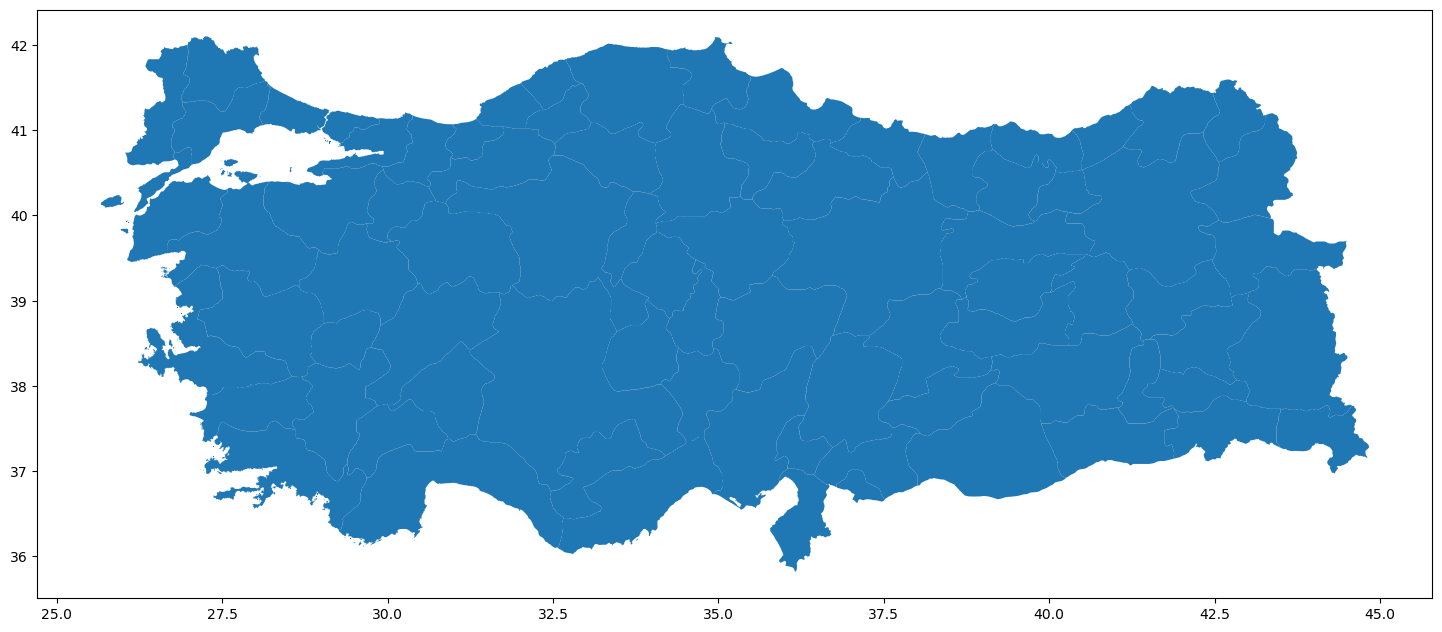

In [22]:
harita_data.plot(figsize=(18,18))

**Sorun yok!**

Şimdi geldik görselleştirme işine...

In [23]:
iller.head()

,ğ,il,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%)
0,1,Adana,26,19.3,668.2,72
1,2,Adiyaman,679,17.4,715.1,68
2,3,Afyonkarahisar,1025,11.7,451.4,64
3,4,Agri,1630,6.3,523.9,67
4,68,Aksaray,979,12.1,359.7,63


In [24]:
import matplotlib.pyplot as plt

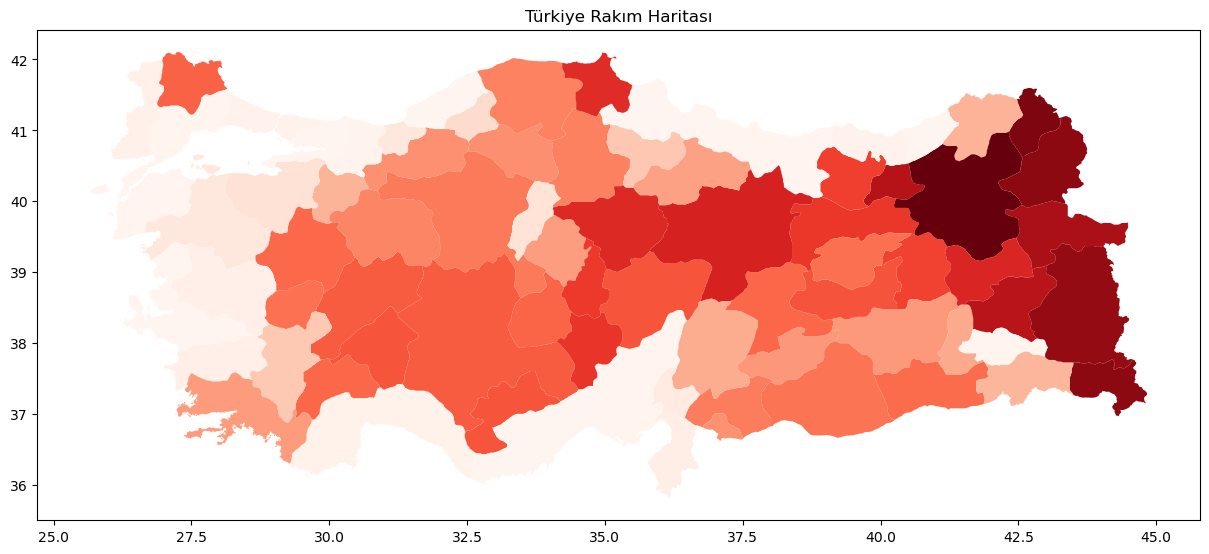

In [25]:
harita_data.plot(column="rakim", cmap="Reds", figsize=(15, 18))
plt.title("Türkiye Rakım Haritası")
plt.show()

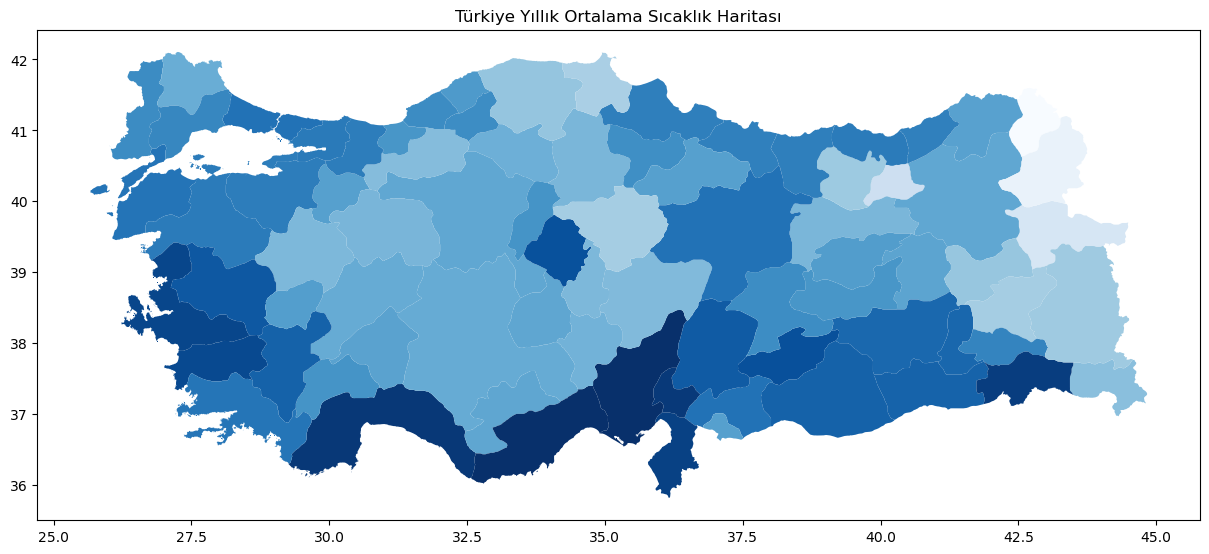

In [26]:
harita_data.plot(column="ortalama_sicaklik", cmap="Blues", figsize=(15, 18))
plt.title("Türkiye Yıllık Ortalama Sıcaklık Haritası")
plt.show()

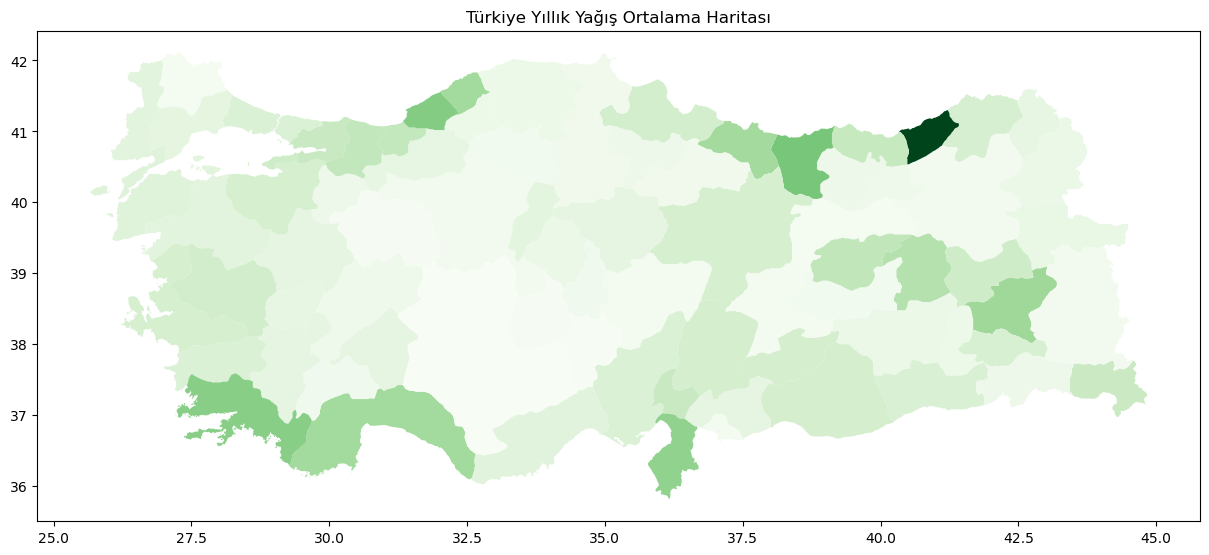

In [27]:
harita_data.plot(column="yagis_ortalama", cmap="Greens", figsize=(15, 18))
plt.title("Türkiye Yıllık Yağış Ortalama Haritası")
plt.show()

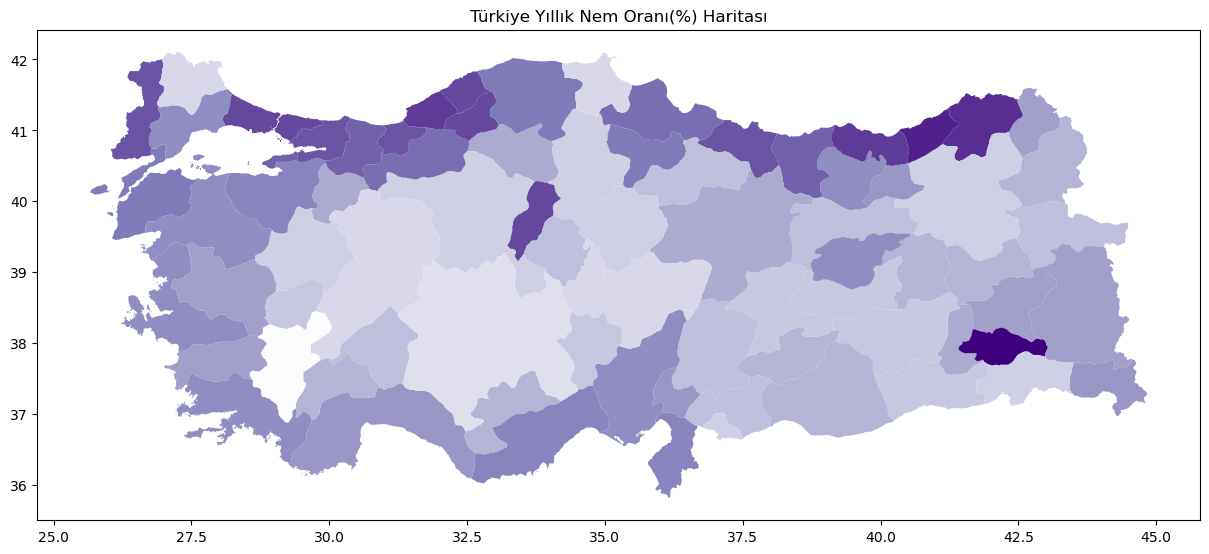

In [28]:
harita_data.plot(column="nem_orani(%)", cmap="Purples", figsize=(15, 18))
plt.title("Türkiye Yıllık Nem Oranı(%) Haritası")
plt.show()

Öncelikle elimizdeki verinin bir kopyasını oluşturuyoruz ve daha sonra **geometry** kolonunda yer alan enlem ve boylamların ortalama değerlerini hesaplıyoruz ki il isimlerini tek bir nokta olarak yerleştirebilelim. 

In [29]:
harita_data

,ID_0,ISO,NAME_0,ID_1,il,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,ğ,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%)
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...",17,12,15.2,625.3,74
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...",18,730,11.4,415.7,69
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...",19,818,10.9,430.9,65
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...",1,26,19.3,668.2,72
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160...",2,679,17.4,715.1,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051...",67,911,12.6,557.6,66
76,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728...",5,1727,9.5,393.2,70
77,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181...",76,7,14.7,755.9,76
78,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958...",11,1313,9.2,571.4,65


In [30]:
harita_data_points = harita_data.copy()

### CRS dönüşümü

 Enlem ve boylam, Dünya yüzeyindeki eşit mesafeleri temsil etmediğinden, coğrafi bir alanda merkez noktasını hesaplamak bu koordinatlarla doğru değildir. Uzaklaştıkça mesafeler ve alanlar çarpıtılır.
Bu işlemden önce 'GeoSeries.to_crs()' ile geometrileri yansıtmalı bir CBS'ye dönüştürmeliyiz. Bu, daha doğru hesaplamalar için geometrileri düz bir yüzey temsili kullanan yansıtmalı bir CBS'ye dönüştürmeyi sağlar.

In [31]:
crs = harita_data_points.crs
print(crs)

EPSG:4326


In [32]:
target_crs = 'EPSG:32635'

In [33]:
harita_data_points = harita_data_points.to_crs(target_crs)

In [34]:

harita_data_points["center"] = harita_data_points["geometry"].centroid
harita_data_points.set_geometry("center", inplace = True)

In [35]:
harita_data_points

,ID_0,ISO,NAME_0,ID_1,il,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,ğ,rakim,ortalama_sicaklik,yagis_ortalama,nem_orani(%),center
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((419024.422 4411244.764, 419024...",17,12,15.2,625.3,74,POINT (478682.681 4434022.278)
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((1071230.438 4556825.644, 1071338.215...",18,730,11.4,415.7,69,POINT (1043258.285 4524242.510)
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((1155854.057 4590727.452, 1158079.383...",19,818,10.9,430.9,65,POINT (1148932.218 4518791.005)
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((1240829.504 4087085.947, 12408...",1,26,19.3,668.2,72,POINT (1260616.010 4180755.448)
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((1523700.368 4280731.892, 1524763.907...",2,679,17.4,715.1,68,POINT (1499421.410 4245208.920)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((751290.800 4296103.199, 751458.293 4...",67,911,12.6,557.6,66,POINT (705806.146 4267825.576)
76,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((1910667.756 4490563.637, 1912358.428...",5,1727,9.5,393.2,70,POINT (1955892.403 4391956.927)
77,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((702324.569 4508444.692, 702325.413 4...",76,7,14.7,755.9,76,POINT (679206.644 4494903.653)
78,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((1210333.042 4485327.775, 1211074.952...",11,1313,9.2,571.4,65,POINT (1208384.901 4422937.306)


In [36]:
harita_data_points["geometry"]

0     MULTIPOLYGON (((419024.422 4411244.764, 419024...
1     POLYGON ((1071230.438 4556825.644, 1071338.215...
2     POLYGON ((1155854.057 4590727.452, 1158079.383...
3     MULTIPOLYGON (((1240829.504 4087085.947, 12408...
4     POLYGON ((1523700.368 4280731.892, 1524763.907...
                            ...                        
75    POLYGON ((751290.800 4296103.199, 751458.293 4...
76    POLYGON ((1910667.756 4490563.637, 1912358.428...
77    POLYGON ((702324.569 4508444.692, 702325.413 4...
78    POLYGON ((1210333.042 4485327.775, 1211074.952...
79    POLYGON ((918723.196 4613437.865, 918833.735 4...
Name: geometry, Length: 80, dtype: geometry

In [44]:
import networkx as nx
import matplotlib.pyplot as plt


Bu kod, turkiye_iller.shp dosyasından Türkiye'nin illerini içeren bir GeoDataFrame'i yükler. Daha sonra, her bir il için bir düğüm (node) ekler ve komşuluk ilişkilerini belirler. Son olarak, networkx kütüphanesi kullanılarak bu düğümleri ve ilişkileri çizer. with_labels=True ile etiketlerin görüntülenmesini sağlar ve node_size ile düğümlerin boyutunu belirleriz.

Bu kod, turkiye_iller.shp dosyasının mevcut olduğunu varsayar. Eğer bu dosya farklı bir formatta veya isimdeyse, dosya yolunu ve dosya biçimini değiştirmeniz gerekebilir. Ayrıca, touches metodu geometrik ilişkileri belirlemek için kullanılır, bu durumda illerin sınırları birbirine dokunuyorsa, bu iller arasında bir kenar oluşturulur. Bu, illerin birbirine bitişik olduğu durumları ele alır.

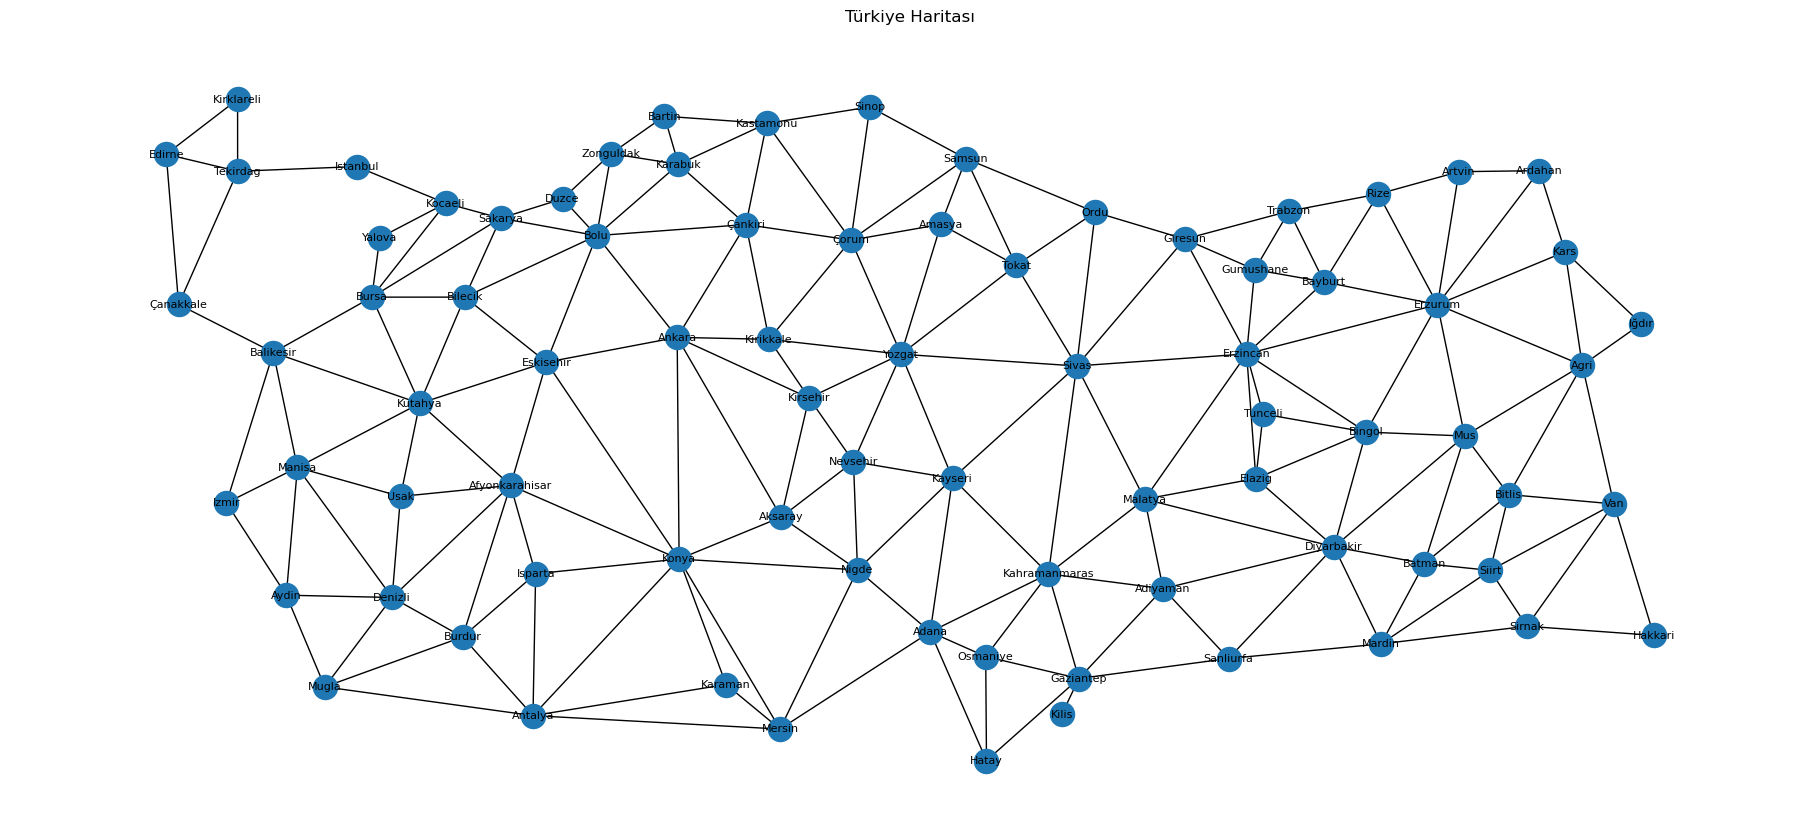

In [55]:
# Boş bir NetworkX grafiği oluşturun
G = nx.Graph()

# İller arasındaki komşuluk ilişkilerini belirleyin
for index, il in turkiye_iller.iterrows():
    for jndex, jil in turkiye_iller.iterrows():
        if il["geometry"].touches(jil["geometry"]):
            G.add_edge(il["il"], jil["il"])

# Grafik çizimi
plt.figure(figsize=(18, 8))
pos = {il["il"]: il["geometry"].centroid.coords[0] for index, il in turkiye_iller.iterrows()}
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8)
plt.title("Türkiye Haritası")
plt.show()

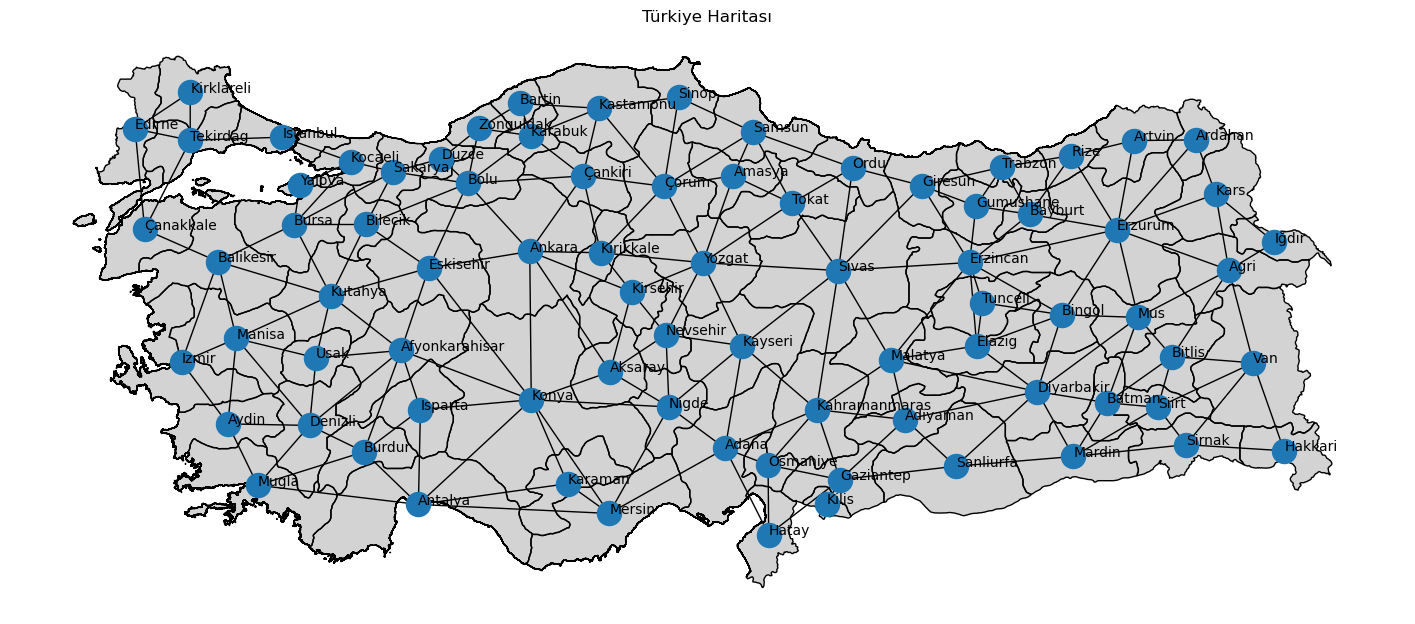

In [79]:

# Grafik çizimi
plt.figure(figsize=(18, 8))

# Türkiye sınırlarını çiz
turkiye_iller.plot(ax=plt.gca(), color='lightgrey')

# İl sınırlarını çiz
turkiye_iller.plot(ax=plt.gca(), edgecolor='black', facecolor='none')

# İl etiketlerini ekle
for index, row in turkiye_iller.iterrows():
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['il'], fontsize=10)

pos = {il["il"]: il["geometry"].centroid.coords[0] for index, il in turkiye_iller.iterrows()}
nx.draw(G, pos, with_labels=False, node_size=300, font_size=8)

plt.title("Türkiye Haritası")
plt.show()